# Car Safety Evaluation(Comparing KNN and Random Forest)

In [1]:
import sklearn
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn import linear_model, preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import train_test_split
import os

%matplotlib inline

In [2]:
data = pd.read_csv("Desktop/Spring 2021/DM/car.data.csv")
print(data.head())

  buying  maint door persons lug_boot safety  class
0  vhigh  vhigh    2       2    small    low  unacc
1  vhigh  vhigh    2       2    small    med  unacc
2  vhigh  vhigh    2       2    small   high  unacc
3  vhigh  vhigh    2       2      med    low  unacc
4  vhigh  vhigh    2       2      med    med  unacc


In [3]:
data.shape

(1728, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   door      1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
data.isnull()

,buying,maint,door,persons,lug_boot,safety,class
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1723,False,False,False,False,False,False,False
1724,False,False,False,False,False,False,False
1725,False,False,False,False,False,False,False
1726,False,False,False,False,False,False,False


In [6]:
data.isnull().sum()

buying      0
maint       0
door        0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

# KNN

In [7]:
le = preprocessing.LabelEncoder()


In [8]:
buying = le.fit_transform(list(data["buying"]))
maint = le.fit_transform(list(data["maint"]))
door = le.fit_transform(list(data["door"]))
persons = le.fit_transform(list(data["persons"]))
lug_boot = le.fit_transform(list(data["lug_boot"]))
safety = le.fit_transform(list(data["safety"]))
cls = le.fit_transform(list(data["class"]))

In [9]:
predict = "class"

In [10]:
X = list(zip(buying, maint, door, persons, lug_boot, safety))
y = list(cls)

In [11]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

In [12]:
model = KNeighborsClassifier(n_neighbors=9)

In [13]:
model.fit(x_train, y_train)
acc = model.score(x_test, y_test)
print(acc)

0.9710982658959537


## Accuracy of KNN : 0.9710982658959537

In [14]:
predicted = model.predict(x_test)
names = ["unacc", "acc", "good", "vgood"]

In [15]:
for x in range(len(predicted)):
    print("Predicted:", names[predicted[x]], " Data:", x_test[x], " Actual:", names[y_test[x]])


Predicted: good  Data: (3, 3, 3, 2, 1, 0)  Actual: good
Predicted: good  Data: (2, 0, 3, 1, 1, 1)  Actual: good
Predicted: unacc  Data: (3, 1, 0, 2, 0, 2)  Actual: unacc
Predicted: unacc  Data: (0, 2, 2, 2, 1, 0)  Actual: unacc
Predicted: good  Data: (2, 2, 0, 1, 0, 1)  Actual: good
Predicted: unacc  Data: (2, 0, 1, 1, 1, 2)  Actual: good
Predicted: good  Data: (3, 0, 3, 2, 2, 2)  Actual: good
Predicted: good  Data: (3, 2, 1, 2, 2, 2)  Actual: good
Predicted: good  Data: (1, 3, 0, 0, 1, 2)  Actual: good
Predicted: unacc  Data: (2, 2, 1, 1, 0, 2)  Actual: unacc
Predicted: good  Data: (0, 3, 2, 0, 0, 1)  Actual: good
Predicted: vgood  Data: (1, 2, 2, 1, 1, 0)  Actual: vgood
Predicted: good  Data: (2, 0, 3, 0, 0, 2)  Actual: good
Predicted: unacc  Data: (3, 2, 3, 2, 1, 0)  Actual: unacc
Predicted: good  Data: (1, 0, 0, 2, 1, 1)  Actual: good
Predicted: good  Data: (0, 3, 3, 0, 0, 2)  Actual: good
Predicted: good  Data: (2, 1, 0, 1, 0, 0)  Actual: vgood
Predicted: good  Data: (3, 3, 0, 2, 

In [16]:
for x in range(len(predicted)):
    print("Predicted:", names[predicted[x]], " Data:", x_test[x], " Actual:", names[y_test[x]])
    n = model.kneighbors([x_test[x]], 9, True)
    print("N: ", n)

Predicted: good  Data: (3, 3, 3, 2, 1, 0)  Actual: good
N:  (array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.41421356, 1.41421356, 1.41421356]]), array([[1110,  219, 1106, 1513, 1355,  341,  407, 1548,  892]]))
Predicted: good  Data: (2, 0, 3, 1, 1, 1)  Actual: good
N:  (array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.41421356]]), array([[ 567, 1211,  546, 1061, 1220,  724, 1056, 1122, 1296]]))
Predicted: unacc  Data: (3, 1, 0, 2, 0, 2)  Actual: unacc
N:  (array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.41421356, 1.41421356]]), array([[1524,  769,  989,  272,  718,  474, 1161,  862,  841]]))
Predicted: unacc  Data: (0, 2, 2, 2, 1, 0)  Actual: unacc
N:  (array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.41421356]]), array([[ 412, 1236,  764,  634,   21,  733,  723,

# Random Forest

In [17]:
# assigning column names 
data.columns = ["buying","maint","doors","persons","lug_boot","safety","value"]
data.head()

,buying,maint,doors,persons,lug_boot,safety,value
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


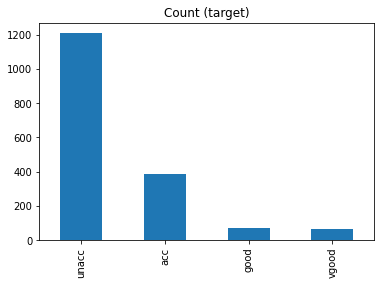

In [18]:
data.value.value_counts().plot(kind='bar', title='Count (target)');


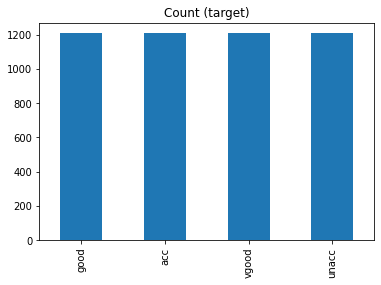

In [19]:
# Class count
class_count = data.value.value_counts()
# for oversampling getting the max count
max_class = max(class_count)

# Divide DataFrame by class
df_class_0 = data[data['value'] == "acc"]
df_class_1 = data[data['value'] == "good"]
df_class_2 = data[data['value'] == "unacc"]
df_class_3 = data[data['value'] == "vgood"]

#Oversampling
df_class_0_over = df_class_0.sample(max_class,replace = True)
df_class_1_over = df_class_1.sample(max_class,replace = True)
# df_class_2_over = df_class_2.sample(max_class) # not using maximum class
df_class_3_over = df_class_3.sample(max_class,replace = True)

data_os = pd.concat([df_class_0_over,df_class_1_over,df_class_3_over,df_class_2], axis = 0)
data_os.value.value_counts().plot(kind='bar', title='Count (target)');

In [20]:
# data cleansing
data_os.doors = data_os.doors.replace({"5more": 5}) 
# data_os.doors = data_os.doors.replace({"3":2,"5":4,"2":2,"4":4,5:4})
data_os.persons = data_os.persons.replace({"more": 5})
data_os.head()

,buying,maint,doors,persons,lug_boot,safety,value
806,high,low,3,5,med,high,acc
400,vhigh,low,4,5,med,med,acc
1024,med,high,3,5,big,med,acc
314,vhigh,med,5,4,big,high,acc
1441,low,high,3,4,small,med,acc


In [21]:
# label encoding
map1 = {"low" : 1, "med":2,"high":3, "vhigh": 4}
map2 = {"small" : 1, "med":2,"big":3}
data_os["buying"] = data_os["buying"].map(map1)
data_os["maint"] = data_os["maint"].map(map1)
data_os["safety"] = data_os["safety"].map(map1)
data_os["lug_boot"] = data_os["lug_boot"].map(map2)
data_os.head()

,buying,maint,doors,persons,lug_boot,safety,value
806,3,1,3,5,2,3,acc
400,4,1,4,5,2,2,acc
1024,2,3,3,5,3,2,acc
314,4,2,5,4,3,3,acc
1441,1,3,3,4,1,2,acc


In [22]:
data_os["doors"]  = pd.to_numeric(data_os["doors"])
data_os["persons"] = pd.to_numeric(data_os["persons"])

In [23]:
data_os["car_type"] = data_os["doors"]+data_os["persons"] # created feature
type_dict = {4:"Coupe",
             5:"Coupe",
            6:"GT",
            7:"Sedan",
            8:"Hatchback",
            9:"SUV",
            10:"SUV"}
# data_os["car_type"] = data_os["car_type"].map(type_dict)

# set(data_os["car_type"].values.tolist())
data_os["car_type"] = data_os["car_type"].astype('category')

In [24]:
target = ['value']
reject = target
features = [x for x in data_os.columns if x not in reject]
x = data_os[features]
y = data_os[target]

In [25]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.25, random_state = 0)
print(xTrain.shape)
print(xTest.shape)

(3630, 7)
(1210, 7)


In [26]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_jobs=-1,random_state=51)

model.fit(xTrain,yTrain)
print(model.score(xTest,yTest))
print(sklearn.metrics.f1_score(yTest,model.predict(xTest),average='macro'))

0.9950413223140496
0.995174734937199


<ipython-input-26-57d3a7aec0ec>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xTrain,yTrain)


## Random Forest has better accuracy than KNN